<a href="https://colab.research.google.com/github/executer-spec/Analise-titanic/blob/main/Analise_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. TREINO
# 2. VALIDAÇÃO
# 3. TESTE

In [ ]:
# importando dados
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',train.shape[1], "\n"
      'Entradas: ', train.shape[0])

# verificando as primeiras entradas
train.head()


Dimensões do Dataset 
Variáveis:  12 
Entradas:  891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#pandas usa floats quando tem dados ausentes
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# mostrando a quantindade de dados ausentes por variável
(train.isnull().sum()).sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [ ]:
#dados ausentes por Survived
train.set_index('Survived').isna().sum(level=0)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,0.0,0.0,481.0,0.0
1,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,206.0,2.0


In [ ]:
# verificando a distribuição estatistica
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


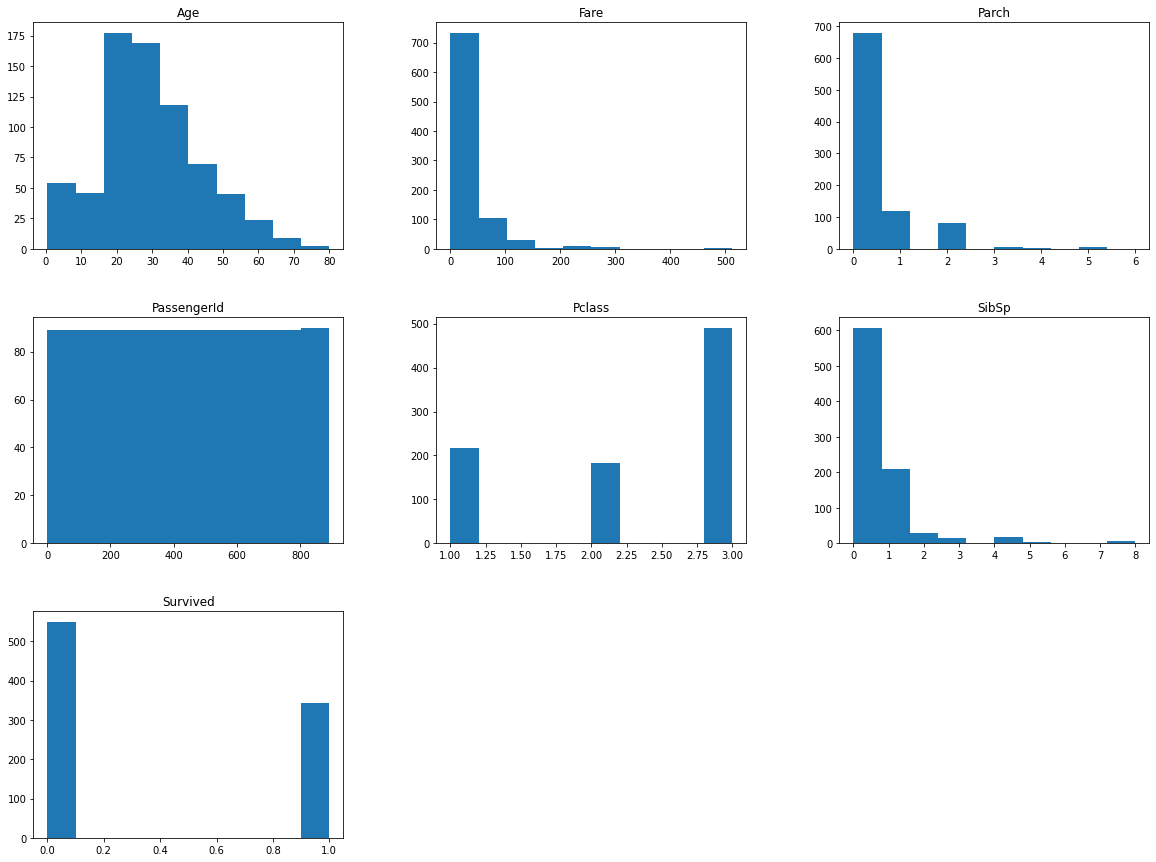

In [ ]:
# verificando as distribuiçoes
train.hist(figsize=(20,15), grid=False);

In [ ]:
# identificando os outliers para a variável Survived
q1_Survived = train.Survived.quantile(.25)
q3_Survived = train.Survived.quantile(.75)
IQR_Survived = q3_Survived - q1_Survived
print('IQR da variável Survived: ', IQR_Survived)

# definindo os limites
sup_Survived = q3_Survived + 1.5 * IQR_Survived
inf_Survived = q1_Survived - 1.5 * IQR_Survived

print('Limite superior de Survived: ', sup_Survived)
print('Limite inferior de Survived: ', inf_Survived)


IQR da variável Survived:  1.0
Limite superior de Survived:  2.5
Limite inferior de Survived:  -1.5


#Modelo de Machine Learning

RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo = RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=0)

variaveis = ['Sex_bi']

In [ ]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
# Definir uma função para variavel Sex

def transformar_sexo(valor):
  if valor =='female':
    return 1
  else:
    return 0

train['Sex_binario'] = train['Sex'].map(transformar_sexo)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#Features

In [ ]:
features = ['Sex_binario', 'Age']

In [ ]:
X = train[features]
y = train['Survived']

In [ ]:
X.head()

,Sex_binario,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
X = X.fillna(-1)

In [ ]:
modelo.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [ ]:
X_prev = test[features]
X_prev = X_prev.fillna(-1)
X_prev.head()

,Sex_binario,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [ ]:
p = modelo.predict(X_prev)

In [ ]:
p

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


#Criar submission

In [ ]:
sub =pd.Series(p,index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [ ]:
sub.to_csv('modelo1.csv', header=True)

In [ ]:
!head -n10 modelo1.csv

PassengerId,Survived
892,0
893,1
894,0
895,1
896,1
897,0
898,1
899,0
900,1


#Modelo 2

In [ ]:
# importar bibliotecas
from sklearn.model_selection import train_test_split


In [ ]:
np.random.seed(0)
X_treino, X_valid , y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [ ]:
X_treino.head()

,Sex_binario,Age
213,0,30.0
586,0,47.0
499,0,24.0
821,0,27.0
246,1,25.0


In [ ]:
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((445, 2), (446, 2), (445,), (446,))

In [ ]:
modelo2 = RandomForestClassifier(n_estimators=100,n_jobs=1, random_state=0)
modelo2.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
p = modelo.predict(X_valid)

In [ ]:
np.mean(y_valid == p)

0.804932735426009

# Test de validação

In [ ]:
p = (X_valid['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid == p)

0.7825112107623319

#Validação cruzada

In [ ]:
# importar biblioteca
from sklearn.model_selection import  KFold
np.random.seed(1)
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((594, 2), (297, 2), (297,), (297,))

In [ ]:
resultados = []
for rep in range(10):
  print('Rep:', rep)
  kf = KFold(2, shuffle=True, random_state=rep)


  for linhas_treino, linhas_valid in kf.split(X):
    print('Treino:', linhas_treino.shape[0])
    print('Valid:', linhas_valid.shape[0])


    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo3 = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0)
    modelo3.fit(X_treino, y_treino)

    p = modelo3.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Rep: 0
Treino: 445
Valid: 446
Acc: 0.7713004484304933

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Rep: 1
Treino: 445
Valid: 446
Acc: 0.7443946188340808

Treino: 446
Valid: 445
Acc: 0.7955056179775281

Rep: 2
Treino: 445
Valid: 446
Acc: 0.7757847533632287

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Rep: 3
Treino: 445
Valid: 446
Acc: 0.7533632286995515

Treino: 446
Valid: 445
Acc: 0.7573033707865169

Rep: 4
Treino: 445
Valid: 446
Acc: 0.7354260089686099

Treino: 446
Valid: 445
Acc: 0.7415730337078652

Rep: 5
Treino: 445
Valid: 446
Acc: 0.7219730941704036

Treino: 446
Valid: 445
Acc: 0.7056179775280899

Rep: 6
Treino: 445
Valid: 446
Acc: 0.7757847533632287

Treino: 446
Valid: 445
Acc: 0.7303370786516854

Rep: 7
Treino: 445
Valid: 446
Acc: 0.7040358744394619

Treino: 446
Valid: 445
Acc: 0.7348314606741573

Rep: 8
Treino: 445
Valid: 446
Acc: 0.7488789237668162

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Rep: 9
Treino: 445
Valid: 446
Acc: 0.7623318385650224

Treino: 446
Valid:

In [ ]:
np.mean(resultados)

0.7550007557817302

#Modelo 3

In [ ]:
# importar bibliotecas

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold

In [ ]:
resultados = []
kf1 = RepeatedKFold(n_splits=2, n_repeats=10,random_state=10)


for linhas_treino, linhas_valid in kf1.split(X):
    print('Treino:', linhas_treino.shape[0])
    print('Valid:', linhas_valid.shape[0])


    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo3 = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0)
    modelo3.fit(X_treino, y_treino)

    p = modelo3.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.7511210762331838

Treino: 446
Valid: 445
Acc: 0.7617977528089888

Treino: 445
Valid: 446
Acc: 0.7533632286995515

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7690582959641256

Treino: 446
Valid: 445
Acc: 0.7573033707865169

Treino: 445
Valid: 446
Acc: 0.7399103139013453

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7354260089686099

Treino: 446
Valid: 445
Acc: 0.797752808988764

Treino: 445
Valid: 446
Acc: 0.7690582959641256

Treino: 446
Valid: 445
Acc: 0.7640449438202247

Treino: 445
Valid: 446
Acc: 0.7757847533632287

Treino: 446
Valid: 445
Acc: 0.7573033707865169

Treino: 445
Valid: 446
Acc: 0.7556053811659192

Treino: 446
Valid: 445
Acc: 0.7640449438202247

Treino: 445
Valid: 446
Acc: 0.7443946188340808

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7533632286995515

Treino: 446
Valid: 445
Acc: 0.7640449438202247



In [ ]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


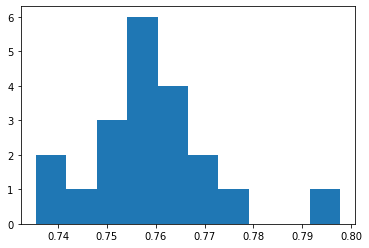

In [ ]:
pylab.hist(resultados);

# Novas Variáveis

In [ ]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [ ]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [ ]:
X = train[variaveis].fillna(-1)
y = train['Survived']

In [ ]:
resultados = []
kf1 = RepeatedKFold(n_splits=2, n_repeats=10,random_state=10)


for linhas_treino, linhas_valid in kf1.split(X):
    print('Treino:', linhas_treino.shape[0])
    print('Valid:', linhas_valid.shape[0])


    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo4 = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0)
    modelo4.fit(X_treino, y_treino)

    p = modelo4.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.7869955156950673

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.7847533632286996

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8004484304932735

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.7982062780269058

Treino: 446
Valid: 445
Acc: 0.8112359550561797



(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <a list of 10 Patch objects>)

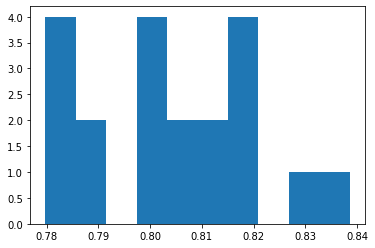

In [ ]:
pylab.hist(resultados)

# Retreinar o modelo

In [ ]:
X.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
def transformar_sexo(valor):
  if valor == 'female':
      return 1
  else:
    return 0


In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

variaveis = ['Sex_binario', 'Age']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [ ]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [ ]:
X = train[variaveis].fillna(-1)
y = train['Survived']

In [ ]:
test[variaveis].head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


In [ ]:
modelo4 = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0)
modelo4.fit(X, y)

p = modelo4.predict(test[variaveis].fillna(-1))

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#Análise erro

In [ ]:
resultados = []
kf1 = RepeatedKFold(n_splits=2, n_repeats=10,random_state=10)


for linhas_treino, linhas_valid in kf1.split(X):
    print('Treino:', linhas_treino.shape[0])
    print('Valid:', linhas_valid.shape[0])


    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo4 = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0)
    modelo4.fit(X_treino, y_treino)

    p = modelo4.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.7869955156950673

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.7847533632286996

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8004484304932735

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.7982062780269058

Treino: 446
Valid: 445
Acc: 0.8112359550561797



In [ ]:
X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:
X_valid_check.shape

(445, 14)

In [ ]:
erros = X_valid_check[X_valid_check['Survived'] !=X_valid_check['p']]
erros = erros[['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare',
               'Cabin','Embarked','Sex_binario','p','Survived']]

erros.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0,1


In [ ]:
mulheres = erros[erros['Sex']== 'female']
homens = erros[erros['Sex']== 'male']

In [ ]:
mulheres.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,1,0
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,1,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,0
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,1,0
419,420,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,1,1,0
357,358,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S,1,1,0
254,255,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,1,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,1,0
654,655,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,1,1,0


In [ ]:
homens.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
238,239,2,"Pengelly, Mr. Frederick William",male,19.00,0,0,28665,10.5000,NaN,S,0,1,0
442,443,3,"Petterson, Mr. Johan Emil",male,25.00,1,0,347076,7.7750,NaN,S,0,1,0
422,423,3,"Zimmerman, Mr. Leo",male,29.00,0,0,315082,7.8750,NaN,S,0,1,0
373,374,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,NaN,C,0,1,0
371,372,3,"Wiklund, Mr. Jakob Alfred",male,18.00,1,0,3101267,6.4958,NaN,S,0,1,0
698,699,1,"Thayer, Mr. John Borland",male,49.00,1,1,17421,110.8833,C68,C,0,1,0
262,263,1,"Taussig, Mr. Emil",male,52.00,1,1,110413,79.6500,E67,S,0,1,0
231,232,3,"Larsson, Mr. Bengt Edvin",male,29.00,0,0,347067,7.7750,NaN,S,0,1,0
214,215,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,0,1,0
721,722,3,"Jensen, Mr. Svend Lauritz",male,17.00,1,0,350048,7.0542,NaN,S,0,1,0


#Novas variaveis

In [ ]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked'] = (train['Embarked'] == 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains('Miss').astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains('Mrs').astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains('Master').astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains('Col').astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains('Major').astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains('Mr').astype(int)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
variaveis

['Sex_binario',
 'Age',
 'Pclass',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Embarked_S',
 'Embarked_C',
 'Cabine_nula',
 'Nome_contem_Miss',
 'Nome_contem_Mrs',
 'Nome_contem_Master',
 'Nome_contem_Col',
 'Nome_contem_Major',
 'Nome_contem_Mr']

In [ ]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked','Embarked_S','Embarked_C','Cabine_nula',
             'Nome_contem_Miss','Nome_contem_Mrs','Nome_contem_Master','Nome_contem_Col','Nome_contem_Major','Nome_contem_Mr']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [ ]:
resultados2 = []
kf1 = RepeatedKFold(n_splits=2, n_repeats=10,random_state=10)


for linhas_treino, linhas_valid in kf1.split(X):
    print('Treino:', linhas_treino.shape[0])
    print('Valid:', linhas_valid.shape[0])


    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo5 = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0)
    modelo5.fit(X_treino, y_treino)

    p = modelo5.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados2.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.7937219730941704

Treino: 446
Valid: 445
Acc: 0.797752808988764

Treino: 445
Valid: 446
Acc: 0.8139013452914798

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.7959641255605381

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.797752808988764

Treino: 445
Valid: 446
Acc: 0.7982062780269058

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.8139013452914798

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8295964125560538

Treino: 446
Valid: 445
Acc: 0.8134831460674158

Treino: 445
Valid: 446
Acc: 0.7802690582959642

Treino: 446
Valid: 445
Acc: 0.8112359550561797

Treino: 445
Valid: 446
Acc: 0.8340807174887892

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.8112359550561797



#Criar submission

((array([1., 0., 2., 4., 3., 2., 4., 2., 0., 2.]),
  array([0.78026906, 0.78565022, 0.79103139, 0.79641256, 0.80179372,
         0.80717489, 0.81255605, 0.81793722, 0.82331839, 0.82869955,
         0.83408072]),
  <a list of 10 Patch objects>),
 (array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
  array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
         0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
         0.83856502]),
  <a list of 10 Patch objects>))

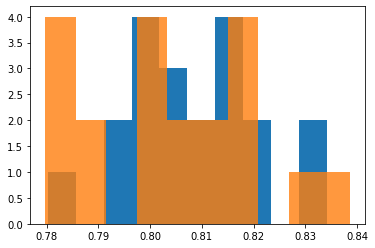

In [ ]:
pylab.hist(resultados2), pylab.hist(resultados,alpha=0.8)


In [ ]:
np.mean(resultados2)

0.8080790547689827

#Retreinar modelo

In [ ]:
def transformar_sexo(valor):
  if valor == 'female':
      return 1
  else:
    return 0


In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

variaveis = ['Sex_binario', 'Age']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [ ]:
test[variaveis].head()

,Sex_binario,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Cabine_nula'] = (test['Cabin'].isnull()).astype(int)

test['Nome_contem_Miss'] = test['Name'].str.contains('Miss').astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains('Mrs').astype(int)

test['Nome_contem_Master'] = test['Name'].str.contains('Master').astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains('Col').astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains('Major').astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains('Mr').astype(int)

#modelo6 = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo6 = LogisticRegression()
modelo6.fit(X,y)

p = modelo6.predict(test[variaveis].fillna(-1))

In [ ]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [ ]:
sub.to_csv("modelo6.csv", header=True)

In [ ]:
!head -n10 modelo2.csv

PassengerId,Survived
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1


In [ ]:
! pip install pycaret

     |████████████████████████████████| 256kB 3.4MB/s 
     |████████████████████████████████| 266kB 10.8MB/s 
     |████████████████████████████████| 1.6MB 10.2MB/s 
     |████████████████████████████████| 266kB 33.8MB/s 
     |████████████████████████████████| 6.8MB 30.7MB/s 
     |████████████████████████████████| 1.2MB 36.1MB/s 
     |████████████████████████████████| 12.4MB 241kB/s 
     |████████████████████████████████| 65.9MB 53kB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 102kB 10.7MB/s 
     |████████████████████████████████| 552kB 37.5MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 3.1MB 28.9MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 604kB 21.0MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 1.1MB 33.2MB/s 
  In

In [ ]:
from pycaret.classification import *


In [ ]:

clf1 = setup(df_train, target ='Survived', log_experiment = True, experiment_name = 'titanic survivor prediction')


NameError: ignored